In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import itertools
from itertools import permutations

## Trabalho Final

### Define 3 matrizes para problema

#### Matriz Complexa

In [2]:
row_1 = [0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
row_2 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
row_3 = [0, 0, 0, 0, 0, -100, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
row_4 = [0, 0, -100, 0, 0, 0.5, 0.6, 0.7, 0.8, -100, 0.8, 0.8, 0.8]
row_5 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_6 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_7 = [0, 0, 0, 0, -100, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_8 = [0, -100, 0, 0, 0, 0.5, 0.6, 0.7, -100, 0.8, 0.8, 0.8, 0.8]
row_9 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]

matrix_complex = np.matrix([row_1, row_2, row_3, row_4, row_5, row_6, row_7, row_8, row_9])

#### Matriz Simples

In [3]:
row_1 = [0, 0, 0, 0, 0]
row_2 = [0, 0, 0, 0, 0]
row_3 = [0, 0, -100, 0.5, 0.5]
row_4 = [0, 0, 0.5, 0.9, 0.9]
row_5 = [0, 0, 0.5, 0.9, 0.9]

matrix_simple = np.matrix([row_1, row_2, row_3, row_4, row_5])

#### Matriz Extra Simples

In [4]:
row_1 = [0, 0, 0]
row_2 = [0, 0, 0]
row_3 = [0, -100, 0.5]
row_4 = [0, 0.5, 0.9]

matrix_extra_simple = np.matrix([row_1, row_2, row_3, row_4])

#### Plota Matriz Complexa

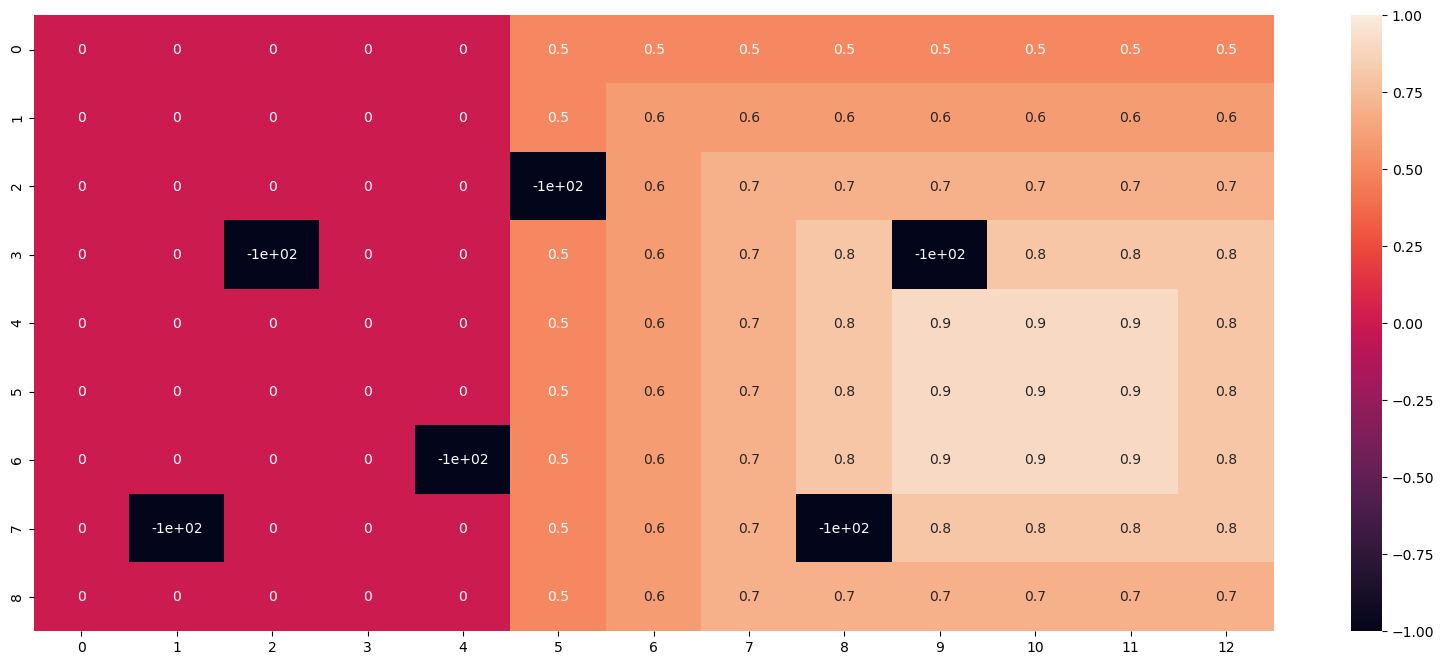

In [5]:
fig, ax = plt.subplots(figsize=(20,8))  

sns.heatmap(matrix_complex, vmin=-1, vmax=1, annot=True)

#### Plota Matriz Simples

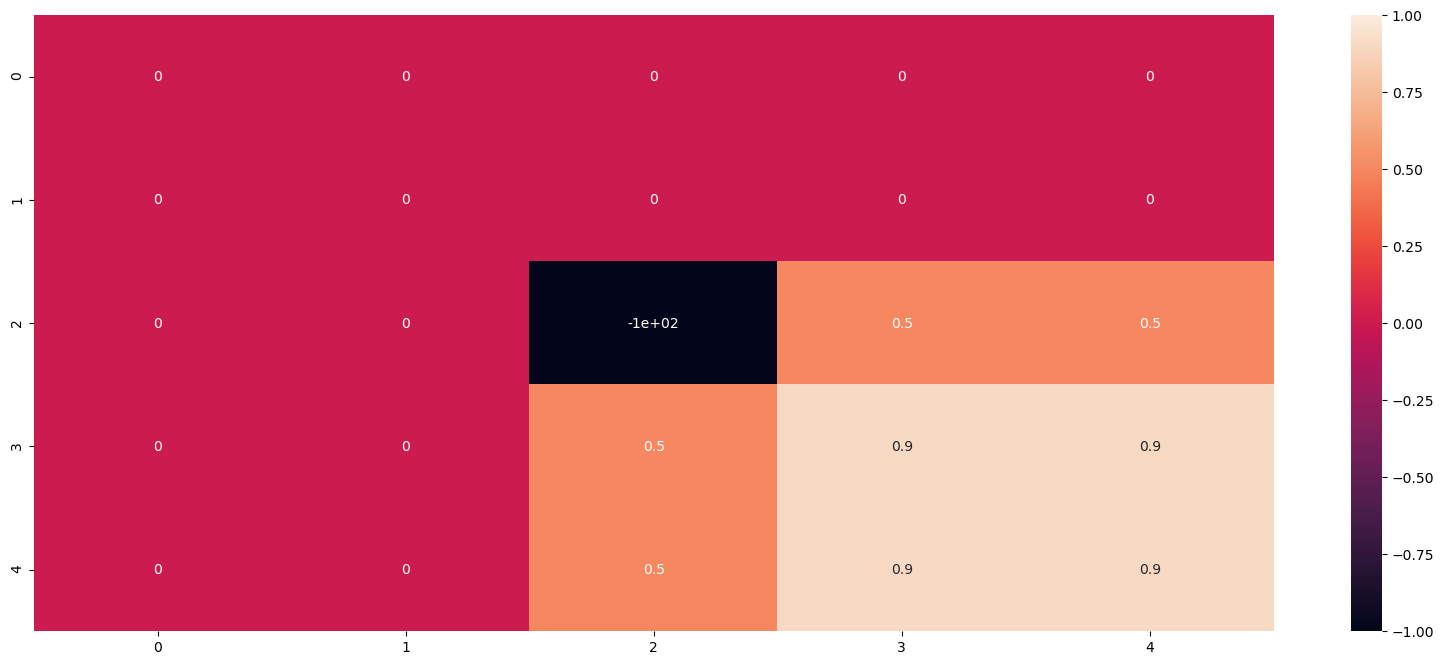

In [6]:
fig, ax = plt.subplots(figsize=(20,8))  

sns.heatmap(matrix_simple, vmin=-1, vmax=1, annot=True)

#### Plota Matriz Extra Simples

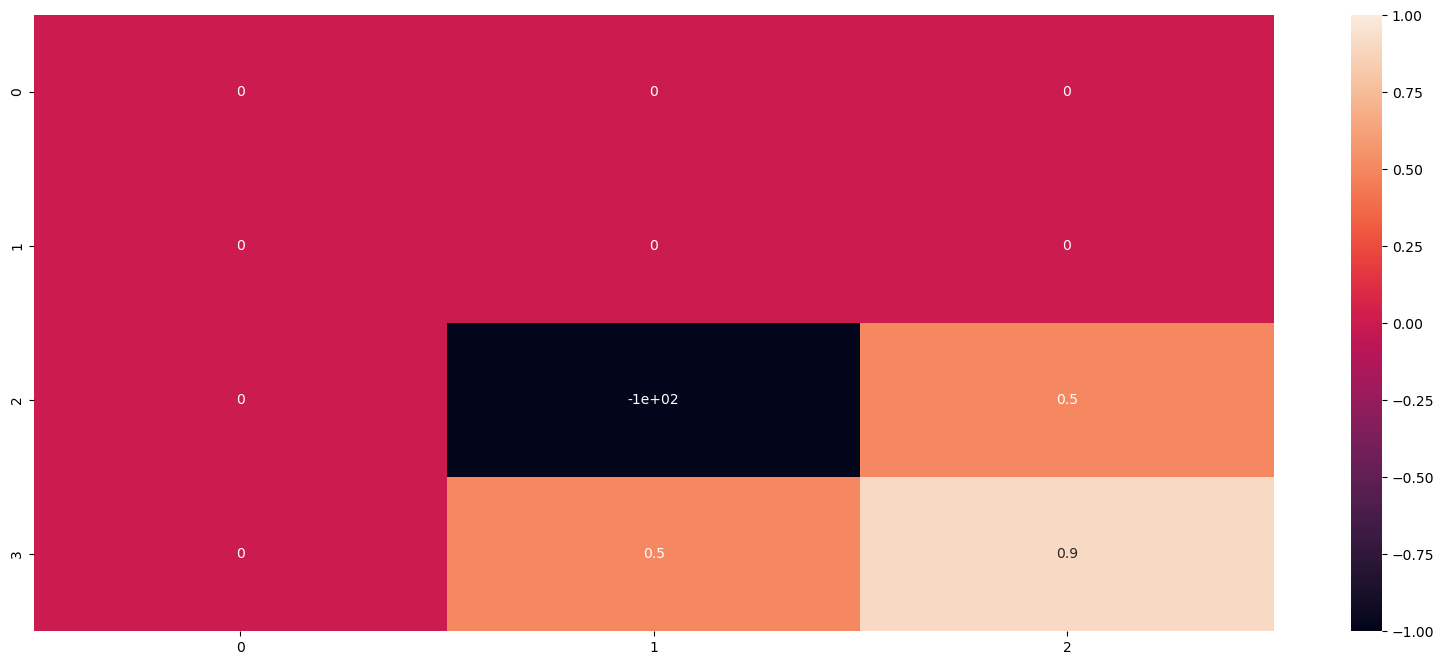

In [7]:
fig, ax = plt.subplots(figsize=(20,8))  

sns.heatmap(matrix_extra_simple, vmin=-1, vmax=1, annot=True)

In [ ]:
np.arange(0, 5, 1)

In [14]:


actions = ["up", "down", "left", "right"]

linhas = np.arange(0, matrix_extra_simple.shape[0], 1)
colunas = np.arange(0, matrix_extra_simple.shape[1], 1)

unique_combinations=list(itertools.product(linhas, colunas))
unique_combinations

[(0, 0),
 (0, 1),
 (0, 2),
 (1, 0),
 (1, 1),
 (1, 2),
 (2, 0),
 (2, 1),
 (2, 2),
 (3, 0),
 (3, 1),
 (3, 2)]

In [15]:
qtable = pd.DataFrame(np.zeros((matrix_extra_simple.shape[1]*matrix_extra_simple.shape[0], len(actions))), index=unique_combinations, columns=actions)
qtable

,up,down,left,right
"(0, 0)",0.0,0.0,0.0,0.0
"(0, 1)",0.0,0.0,0.0,0.0
"(0, 2)",0.0,0.0,0.0,0.0
"(1, 0)",0.0,0.0,0.0,0.0
"(1, 1)",0.0,0.0,0.0,0.0
"(1, 2)",0.0,0.0,0.0,0.0
"(2, 0)",0.0,0.0,0.0,0.0
"(2, 1)",0.0,0.0,0.0,0.0
"(2, 2)",0.0,0.0,0.0,0.0
"(3, 0)",0.0,0.0,0.0,0.0


In [23]:
float(qtable.loc[[(0,0)]]['up'])

0.0

In [ ]:
qtable

In [ ]:
matrix_extra_simple[-1, 0]

In [ ]:
for position in qtable.index:
    print(position)
    #up
    if position[0]!=0: #Se movimento for valido
        qtable.loc[position, 'up'] = matrix_extra_simple[position[0]-1, position[1]]
    #down
    if position[0]<matrix_extra_simple.shape[0]-1: #Se movimento for valido
        qtable.loc[position, 'down'] = matrix_extra_simple[position[0]+1, position[1]]
    #right
    if position[1]<matrix_extra_simple.shape[1]-1: #Se movimento for valido
        qtable.loc[position, 'right'] = matrix_extra_simple[position[0], position[1]+1]
    #left
    if position[1]!=0: #Se movimento for valido
        qtable.loc[position, 'left'] = matrix_extra_simple[position[0], position[1]-1]
    

In [ ]:
qtable

In [ ]:
state=(1,1)
action='up'
new_state = (1,2)
lr=0.3
gamma=0.95

qtable.loc[[state]]

In [ ]:
rtable = pd.DataFrame(np.zeros((matrix_extra_simple.shape[1]*matrix_extra_simple.shape[0], len(actions))), index=unique_combinations, columns=actions)

In [ ]:
for position in rtable.index:
    print(position)
    #up
    if position[0]!=0: #Se movimento for valido
        rtable.loc[position, 'up'] = matrix_extra_simple[position[0]-1, position[1]]
    #down
    if position[0]<matrix_extra_simple.shape[0]-1: #Se movimento for valido
        rtable.loc[position, 'down'] = matrix_extra_simple[position[0]+1, position[1]]
    #right
    if position[1]<matrix_extra_simple.shape[1]-1: #Se movimento for valido
        rtable.loc[position, 'right'] = matrix_extra_simple[position[0], position[1]+1]
    #left
    if position[1]!=0: #Se movimento for valido
        rtable.loc[position, 'left'] = matrix_extra_simple[position[0], position[1]-1]

In [ ]:
rtable

In [ ]:
qtable = pd.DataFrame(np.zeros((matrix_extra_simple.shape[1]*matrix_extra_simple.shape[0], len(actions))), index=unique_combinations, columns=actions)

In [ ]:
qtable

In [ ]:
# Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
state = (2,1)
action = 'down'
new_state = (3,1)
lr=0.3
gamma=0.95

qtable.at[state, action] = qtable.loc[[state]][action]+ lr * (rtable.loc[[state]][action] + gamma * np.max(qtable.loc[[new_state]].values) - qtable.loc[[state]][action])

In [ ]:
qtable

In [ ]:
qtable.index

In [ ]:
vtable = pd.DataFrame(np.zeros((matrix_extra_simple.shape[0], matrix_extra_simple.shape[1])))

In [ ]:
vtable.at[state[0], state[1]]

In [ ]:
for estado in qtable.index:
    vtable.at[estado[0], estado[1]] = np.max(qtable.loc[[estado]].values)

In [ ]:
vtable

In [ ]:
sns.heatmap(vtable, vmin=-1, vmax=1, annot=True)

In [ ]:
0.15+0.3*(0.5+0.95*0.27-0.15)

In [ ]:
qtable

In [ ]:
qtable.loc[[(2,0)]]['up']

In [ ]:
[qtable.loc[[state]]][0].columns

In [ ]:
max(qtable.loc[[state]].values.flatten().tolist())

In [ ]:
qtable.loc[[state]].columns.to_list()[0]

In [ ]:
state = (2,1)
equal_actions=[]
j=0
for i in qtable.loc[[state]].values.flatten().tolist():
    max_value = max(qtable.loc[[state]].values.flatten().tolist())
    if i>= max_value:
        equal_actions.append(qtable.loc[[state]].columns.to_list()[j])
        j+=1
print(equal_actions)

In [ ]:
state = (2,1)
equal_actions=[]
[equal_actions.append() if i>=qtable.loc[[state]].max(axis=1) for i in qtable.loc[[state]].values.flatten().tolist()]

In [ ]:
matrix_extra_simple.shape[1]

In [ ]:
# Fim do jogo: percorre todos os pontos maiores que 0
#              
# Recompensa: recompensa referente a cada estado
# Ações: baixo, direita, esquerda e cima
# Estado: Cada quadrante da matriz

## Define Classes de Estado e Agente (LIMPO)

In [47]:
# global variables
MATRIX_GAME = matrix_simple
START = (0, 0)
DETERMINISTIC = True

game  0  ended in:
1676543325.981114
game  1  ended in:
0.6357660293579102
game  2  ended in:
2.769925594329834
game  3  ended in:
2.2300209999084473
game  4  ended in:
3.221423864364624
game  5  ended in:
0.763054370880127
game  6  ended in:
0.7140152454376221
game  7  ended in:
1.1542716026306152
game  8  ended in:
1.1041607856750488
game  9  ended in:
1.0012552738189697
game  10  ended in:
0.5541350841522217
game  11  ended in:
1.0147037506103516
game  12  ended in:
1.201296091079712
game  13  ended in:
2.4023194313049316
game  14  ended in:
0.8949148654937744
game  15  ended in:
0.4700784683227539
game  16  ended in:
0.8590755462646484
game  17  ended in:
0.4321441650390625
game  18  ended in:
1.1430060863494873
game  19  ended in:
0.6522881984710693
          0         1         2         3         4
0  0.157281  0.000000  0.162973  0.682368  0.379917
1  0.366375  0.615012  0.906918  1.236323  1.020983
2  0.000005  0.028499  0.000000  1.165235  1.141298
3  0.000000  0.409916  0.85

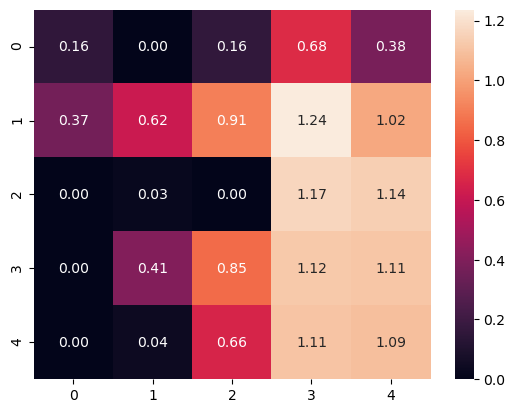

In [101]:
class State:
    # Inicializa estado do jogo
    def __init__(self, state=START, matrix_game=MATRIX_GAME):

        # Matriz inicial com recompensas pré definidas:
        self.ini_reward_matrix = matrix_game

        # Cria tabuleiro zerado com quantidade de colunas e linhas determinado
        self.board = np.zeros([self.ini_reward_matrix.shape[0], self.ini_reward_matrix.shape[1]])

        # Define locais com obstaculos
        i=0
        while i<= self.ini_reward_matrix.shape[0]-1:
            j=0
            while j <= self.ini_reward_matrix.shape[1]-1:
                if self.ini_reward_matrix[i, j]==-100:
                    self.board[i, j]=-100
                j+=1
            i+=1

        # Define o estado do jogo atual. Inicialmente é igual ao parâmetro START
        self.state = state

        # Define variável de termino do jogo como False
        self.isEnd = False
        
        # Define jogo como deterministico ?
        self.determine = DETERMINISTIC


    # Caso perca ou ganhe o jogo, atualiza o estado para fim
    def isEndFunc(self, count):
        if count == 0:
            self.isEnd = True

    # Verifica posição na matriz com base na ação
    def nxtPosition(self, action):
        """
        action: up, down, left, right

        -------------
        0 | 1 | 2| 3|
        1 |
        2 |
        return next position
        """
        if self.determine:
            if action == "up":
                nxtState = (self.state[0] - 1, self.state[1])
            elif action == "down":
                nxtState = (self.state[0] + 1, self.state[1])
            elif action == "left":
                nxtState = (self.state[0], self.state[1] - 1)
            else:
                nxtState = (self.state[0], self.state[1] + 1)
            # if next state legal
            if (nxtState[0] >= 0) and (nxtState[0] <= (self.ini_reward_matrix.shape[0] -1)):
                if (nxtState[1] >= 0) and (nxtState[1] <= (self.ini_reward_matrix.shape[1] -1)):
                    if self.board[nxtState]!= -100:
                        return nxtState
            return self.state

    # Mostra tabuleiro
    def showBoard(self):
        self.board[self.state] = 1
        for i in range(0, self.ini_reward_matrix.shape[0]):
            print('-----------------')
            out = '| '
            for j in range(0, self.ini_reward_matrix.shape[1]):
                if self.board[i, j] == 1:
                    token = '*'
                if self.board[i, j] == -1:
                    token = 'z'
                if self.board[i, j] == 0:
                    token = '0'
                out += token + ' | '
            print(out)
        print('-----------------')

# Agent of player

class Agent:

    def __init__(self, matrix_game=MATRIX_GAME):

        # Matriz inicial com recompensas pré definidas:
        self.ini_reward_matrix = matrix_game

        # Contador de números maiores que 0 que ainda não foram percorridos
        self.count = (self.ini_reward_matrix[self.ini_reward_matrix>0]).shape[1]

        # Inicializa vetor de estados
        self.states = [START]

        # Recompensa Total
        self.total_reward = 0

        # Inicializa vetor de ações
        self.actions = ["up", "down", "left", "right"]

        # Inicializa classe estado
        self.State = State()

        self.game_list = []
        self.time_steps_list = []
        self.time_list = []
        self.states_list = []
        self.total_rewards_list = []
        self.rewards_list = []
        self.vtable_list = []
        self.qtable_list = []
        self.state_reward_list = []

        # Define lr e exp_rate
        self.lr = 0.2
        self.exp_rate = 0.3
        self.gamma = 0.95
        self.d_f = 0.99

        # Inicializar tabela Q
        # Cria listas para cada item da coluna e da linha e combina cada item em tuplas:
        unique_combinations=list(itertools.product(np.arange(0, self.ini_reward_matrix.shape[0], 1), np.arange(0, self.ini_reward_matrix.shape[1], 1)))

        # Cria tabela q zerada:
        self.qtable = pd.DataFrame(np.zeros((self.ini_reward_matrix.shape[1]*self.ini_reward_matrix.shape[0], len(self.actions))), index=unique_combinations, columns=self.actions)

        # Cria tabela de função de valor zerada:
        self.vtable = pd.DataFrame(np.zeros((self.ini_reward_matrix.shape[0], self.ini_reward_matrix.shape[1])))
        
        # Cria tabela de recompensas imediatas:
        self.rtable = pd.DataFrame(np.zeros((self.ini_reward_matrix.shape[1]*self.ini_reward_matrix.shape[0], len(self.actions))), index=unique_combinations, columns=self.actions)
                
        # Vetor com recompensas
        self.rewards = [float(self.rtable.loc[[START]]['up'])]

        self.t1=0

        # Enriquece tabela r com recompensas imediatas pre definidas:
        for position in self.rtable.index:
        #up
            if position[0]!=0: #Se movimento for valido
                self.rtable.loc[position, 'up'] = self.ini_reward_matrix[position[0]-1, position[1]]
            #down
            if position[0]<self.ini_reward_matrix.shape[0]-1: #Se movimento for valido
                self.rtable.loc[position, 'down'] = self.ini_reward_matrix[position[0]+1, position[1]]
            #right
            if position[1]<self.ini_reward_matrix.shape[1]-1: #Se movimento for valido
                self.rtable.loc[position, 'right'] = self.ini_reward_matrix[position[0], position[1]+1]
            #left
            if position[1]!=0: #Se movimento for valido
                self.rtable.loc[position, 'left'] = self.ini_reward_matrix[position[0], position[1]-1]

    # Escolhe uma ação
    def chooseAction(self):
        # Inicializa variáveis
        mx_nxt_reward = 0
        action = ""

        # Se valor aleatório for menor que taxa de exp_rate escolhida, escolhe ação aleatória
        if np.random.uniform(0, 1) <= self.exp_rate:
            
            # Escolhe ação aleatória
            action = np.random.choice(self.actions)

        # Caso contrário, escolhe ação de acordo com estado com maior valor
        else:
            # Seleciona ação que maximiza tabela Q
            # Greedy action
            mx_nxt_reward=0
            for a in self.actions:
                # verifica estado com maior valor e seleciona ação correspondente
                nxt_reward = float(self.qtable.loc[[self.State.state]][a])
                if nxt_reward >= mx_nxt_reward:
                    action = a
                    mx_nxt_reward = nxt_reward

        # Caso tenham duas ou mais ações empatadas com maior valor, escolhe uma aleatoriamente
            equal_actions=[]
            for a in self.actions:
                # verifica estado com maior valor e seleciona ação correspondente
                nxt_reward = float(self.qtable.loc[[self.State.state]][a])
                if nxt_reward == mx_nxt_reward:
                    equal_actions.append(a)
            action = np.random.choice(equal_actions)
        return action

    # Realiza ação
    def takeAction(self, action):

        # Altera posição atual com base na ação tomada
        position = self.State.nxtPosition(action)

        # Retorna a posição atual, depois de realizar ação
        return State(state=position)

    # Update Q table
    def updateQtable(self, action):
        pos_atual=self.State.nxtPosition(action)
        estados=self.states
        if self.State.nxtPosition(action) in (self.states):
            # Caso já tenha passado por esse estado previamente, considera recompensa como zero
            r=0
        else:
            # Realiza update na tabela Q usando recompensa descontada pelo tempo
            r = float(self.rtable.loc[[self.State.state]][action])*(self.d_f**(len(self.states)-1))

        # Realiza update no vetor de recompensas
        self.rewards.append(r)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        self.qtable.at[self.State.state, action] = self.qtable.loc[[self.State.state]][action]+ \
                                            self.lr * (r + self.gamma * np.max(self.qtable.loc[[self.State.nxtPosition(action)]].values) - \
                                                self.qtable.loc[[self.State.state]][action])

    def calculateValuefunc(self):
        #Cria tabela com função de valor zerada
        self.vtable = pd.DataFrame(np.zeros((matrix_extra_simple.shape[0], matrix_extra_simple.shape[1])))

        #Enriquece tabela de função de valor com valores máximos da tabela q
        for row in self.qtable.index:
            self.vtable.at[row[0], row[1]] = np.max(self.qtable.loc[[row]].values)

        return self.vtable
    # Reinicia o jogo
    def reset(self):
        self.states = [START]
        self.rewards = [float(self.rtable.loc[[START]]['up'])]
        self.state_reward_dict=[]
        self.State = State()
        # Contador de números maiores que 0 que ainda não foram percorridos
        self.count = (self.ini_reward_matrix[self.ini_reward_matrix>0]).shape[1]
        self.total_reward = 0
        self.t1 = time.time()

    def save_info(self, i, time):

        # Armazena número do jogo em lista
        self.game_list.append(i)

        # Armazena quantidade de passos percorridos em lista
        self.time_steps_list.append(len(self.states))

        # Armazena tempo total de cada jogo em lista
        self.time_list.append(time)

        # Armazena lista de estados percorridos em lista
        self.states_list.append(self.states)

        # Armazena recompensa total do jogo em lista
        self.total_rewards_list.append(np.sum(self.rewards))

        # Armazena recompensas de cada estado em lista
        self.rewards_list.append(self.rewards)

        # Armazena vtable em lista 
        self.vtable_list.append(self.calculateValuefunc().to_dict('dict'))

        # Armazena tabela Q em lista
        self.qtable_list.append(self.qtable.to_dict('dict'))

        #
        self.state_reward_dict = list(zip(self.states, self.rewards))
        self.state_reward_list.append(self.state_reward_dict)

    def generate_result_file(self):

        arquivo_final = pd.DataFrame()

        arquivo_final['JOGO'] = self.game_list
        arquivo_final['TIMESTEPS'] = self.time_steps_list
        arquivo_final['TIME'] = self.time_list
        arquivo_final['STATES'] = self.states_list
        arquivo_final['REWARDS'] = self.rewards_list
        arquivo_final['STATES_REWARDS'] = self.state_reward_list      
        arquivo_final['TOTAL REWARDS'] = self.total_rewards_list
        arquivo_final['Vtable'] = self.vtable_list
        arquivo_final['Qtable'] = self.qtable_list

        arquivo_final.to_csv(r'Resultado_RL_Q_Learning\resultados_q_learning.csv', sep=';')

    def play(self, rounds=10):
        i = 0
        # Joga n partidas
        while i < rounds:
            if self.State.isEnd==False:
                # Escolhe uma ação
                action = self.chooseAction()

                #Update na tabela Q
                self.updateQtable(action)

                # appenda no vetor de estados
                self.states.append(self.State.nxtPosition(action))
                # print("current position {} action {}".format(self.State.state, action))

                # Realiza a ação, atualiza o estado
                self.State = self.takeAction(action)

                # Caso estado ainda não tenha sido percorrido e esteja dentro dos estados com recompensa>0, reduz contador 
                if (self.State.state not in self.states[:-1]) and (self.ini_reward_matrix[self.State.state]>0):
                    self.count-=1

                self.State.isEndFunc(count=self.count)
                # print("nxt state", self.State.state)
                # print("states: ", self.states)
                # print('count = ', self.count)

            if self.State.isEnd==True:
                #Finaliza tempo de duração do jogo
                duracao_jogo = (time.time()-self.t1)

                #Printa tempo
                print('game ' ,i, ' ended in:')
                print(duracao_jogo)

                # Salva informações em listas
                self.save_info(i=i, time=duracao_jogo)

                self.reset()
                i += 1
        
        # Gera Arquivo com Resultados
        self.generate_result_file()

                # print("---------------------")
    def showValues(self):
        sns.heatmap(self.calculateValuefunc(), annot=True, fmt=".2f")
        print(self.calculateValuefunc())
if __name__ == "__main__":
    ag = Agent()
    ag.play(20)
    print(ag.showValues())

In [53]:
teste =  pd.DataFrame()
teste['a'] = [1,2,3]
teste.to_csv(r'Resultado_RL_Q_Learning\resultados_q_learning.csv')

In [ ]:
estados = [(0,0), (0,1), (0,2), (0,3), (3,2), (3,1)]
estado = (3,2)
print((estado not in estados))
print(matrix_extra_simple[estado]>0)
# (2,2), (3,2), (3,1)